# Understanding the role of Stepsize

In [1]:
from kd_ub import kd_traj
import numpy as np
import matplotlib.pyplot as plt

# Quadratic Potential ($\gamma = 0.5$, $c_0 = 1$, $T = 10$)

/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:55: RuntimeWarning: divide by zero encountered in arctanh
  kappa = np.arctanh(eta)
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:57: RuntimeWarning: invalid value encountered in scalar divide
  A = np.cosh(kappa) / np.cosh(alpha * h + kappa)
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:58: RuntimeWarning: invalid value encountered in scalar subtract
  B = (np.sinh(alpha * h + kappa) - np.sinh(kappa)) / (alpha * np.cosh(alpha * h + kappa))
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:55: RuntimeWarning: invalid value encountered in arctanh
  kappa = np.arctanh(eta)


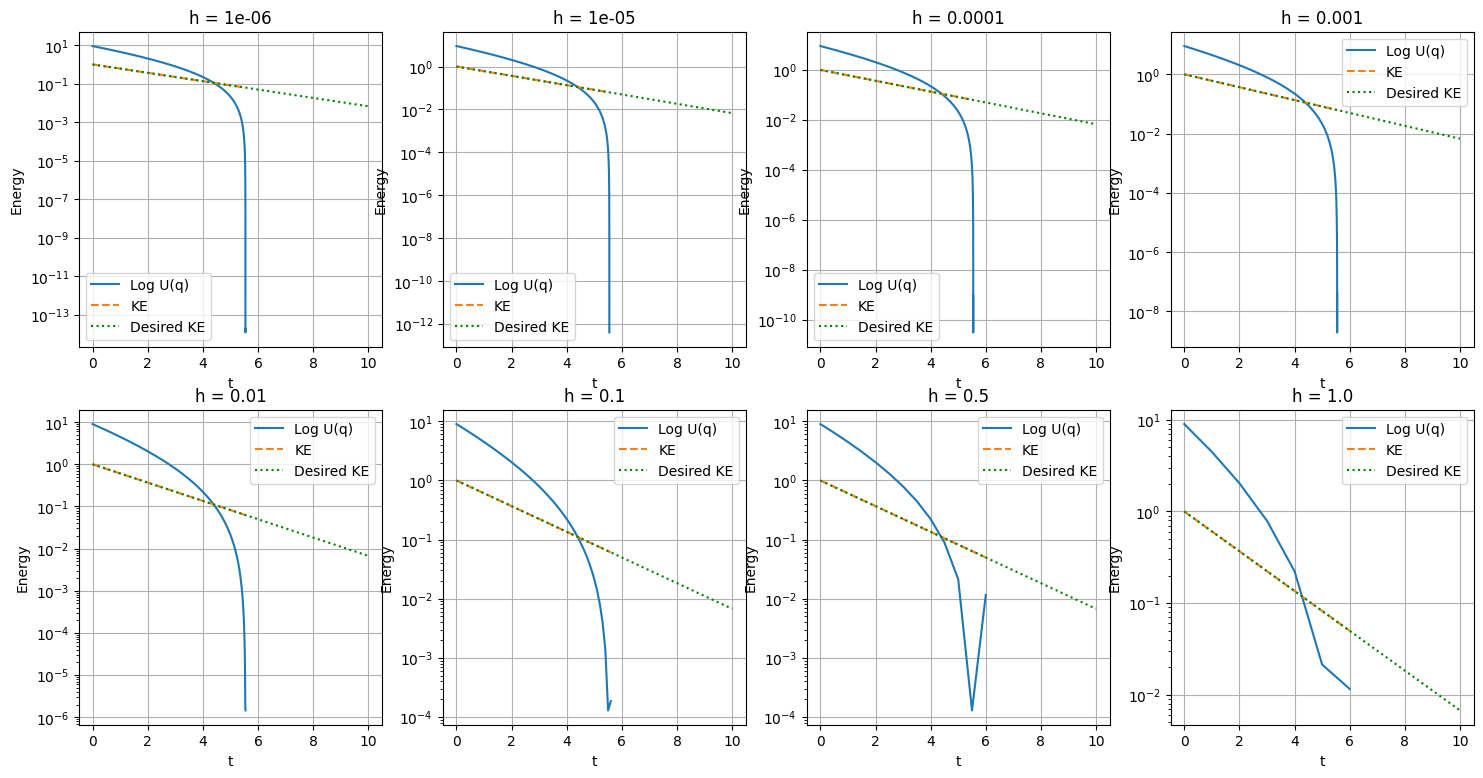

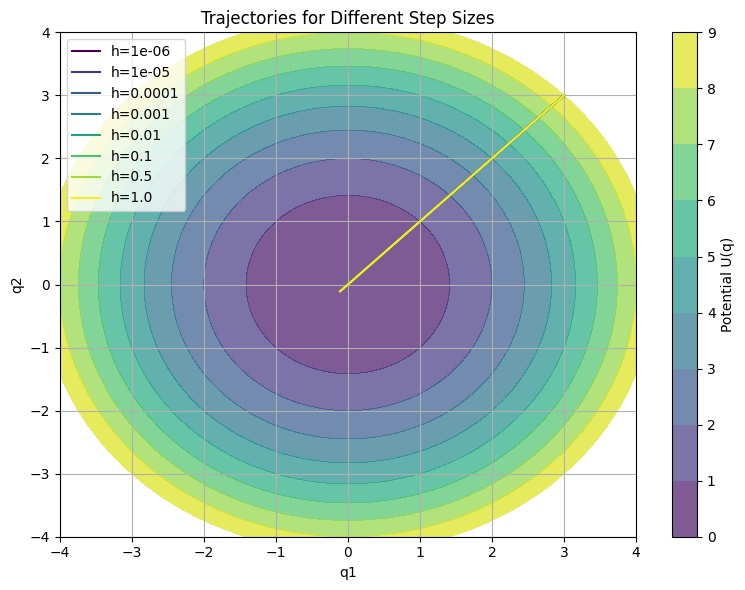

In [1]:
# Define parameters
Pars = {}
Model = {}
Pars['gamma'] = 0.5
decay_exp = {
    'c': lambda t, P: np.exp(-P['gamma'] * t),
    'cp': lambda t, P: -P['gamma'] * np.exp(-P['gamma'] * t),
    'csqrt': lambda t, P: np.sqrt(np.exp(-P['gamma'] * t))
}
Pars['decay'] = decay_exp

U_quad = lambda x, P: 0.5 * (x[0]**2 + x[1]**2)
F_quad = lambda x, P: -np.array([x[0], x[1]])

Model['U'] = U_quad
Model['F'] = F_quad

# Step sizes to test
step_sizes = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1e0]
T_final = 10  # Keep total simulation time fixed
trajectories = {}

# Compute trajectories for each step size
for h in step_sizes:
    Ns = int(T_final / h)
    x0 = np.array([3., 3.])
    p0 = F_quad(x0, Pars)
    p0 /= np.linalg.norm(p0)
    p0 *= np.sqrt(2)

    T, X, P, KE, PE = kd_traj(x0, p0, h, Ns, Pars, Model)
    trajectories[h] = (T, X, P, KE, PE)

# Plot all trajectories on a single contour plot
fig, axs = plt.subplots(2, 4, figsize=(18, 9))

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X_grid, Y_grid = np.meshgrid(x, y)
Z = 0.5 * (X_grid**2 + Y_grid**2)

fig_contour, ax_contour = plt.subplots(figsize=(8, 6))
contourf = ax_contour.contourf(X_grid, Y_grid, Z, levels=np.linspace(0, 9, 10), cmap='viridis', alpha=0.7)
fig.colorbar(contourf, ax=ax_contour, label='Potential U(q)')

# Plot each trajectory
colors = plt.cm.viridis(np.linspace(0, 1, len(step_sizes)))
for i, h in enumerate(step_sizes):
    _, X, _, _, _ = trajectories[h]
    ax_contour.plot(X[:, 0], X[:, 1], label=f'h={h}', color=colors[i], lw=1.5)

ax_contour.set_xlabel('q1')
ax_contour.set_ylabel('q2')
ax_contour.set_title('Trajectories for Different Step Sizes')
ax_contour.legend()
ax_contour.grid(True)

# Plot log potential and kinetic energy in a 2x4 grid
for i, h in enumerate(step_sizes):
    T, _, P, _, PE = trajectories[h]

    row, col = divmod(i, 4)

    # Log potential energy plot
    axs[row, col].semilogy(T, PE, label='Log U(q)')
    axs[row, col].semilogy(T, 0.5 * np.linalg.norm(P, axis=1)**2, label='KE', linestyle='dashed')
    axs[row, col].semilogy(T, np.exp(-Pars['gamma'] * T), label='Desired KE', color='green', linestyle='dotted')

    axs[row, col].set_title(f'h = {h}')
    axs[row, col].set_xlabel('t')
    axs[row, col].set_ylabel('Energy')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()


# Rosenbrock Function ($\gamma = 0.1$, $c_0 = 1$, $T = 100$)

0.0001


/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:50: RuntimeWarning: invalid value encountered in divide
  F_tilde, p_tilde = F/nF, p/np.sqrt(c)


0.001
0.01
0.1


/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:57: RuntimeWarning: overflow encountered in cosh
  A = np.cosh(kappa) / np.cosh(alpha * h + kappa)
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:58: RuntimeWarning: overflow encountered in sinh
  B = (np.sinh(alpha * h + kappa) - np.sinh(kappa)) / (alpha * np.cosh(alpha * h + kappa))
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:58: RuntimeWarning: overflow encountered in cosh
  B = (np.sinh(alpha * h + kappa) - np.sinh(kappa)) / (alpha * np.cosh(alpha * h + kappa))
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:58: RuntimeWarning: invalid value encountered in scalar divide
  B = (np.sinh(alpha * h + kappa) - np.sinh(kappa)) / (alpha * np.cosh(alpha * h + kappa))


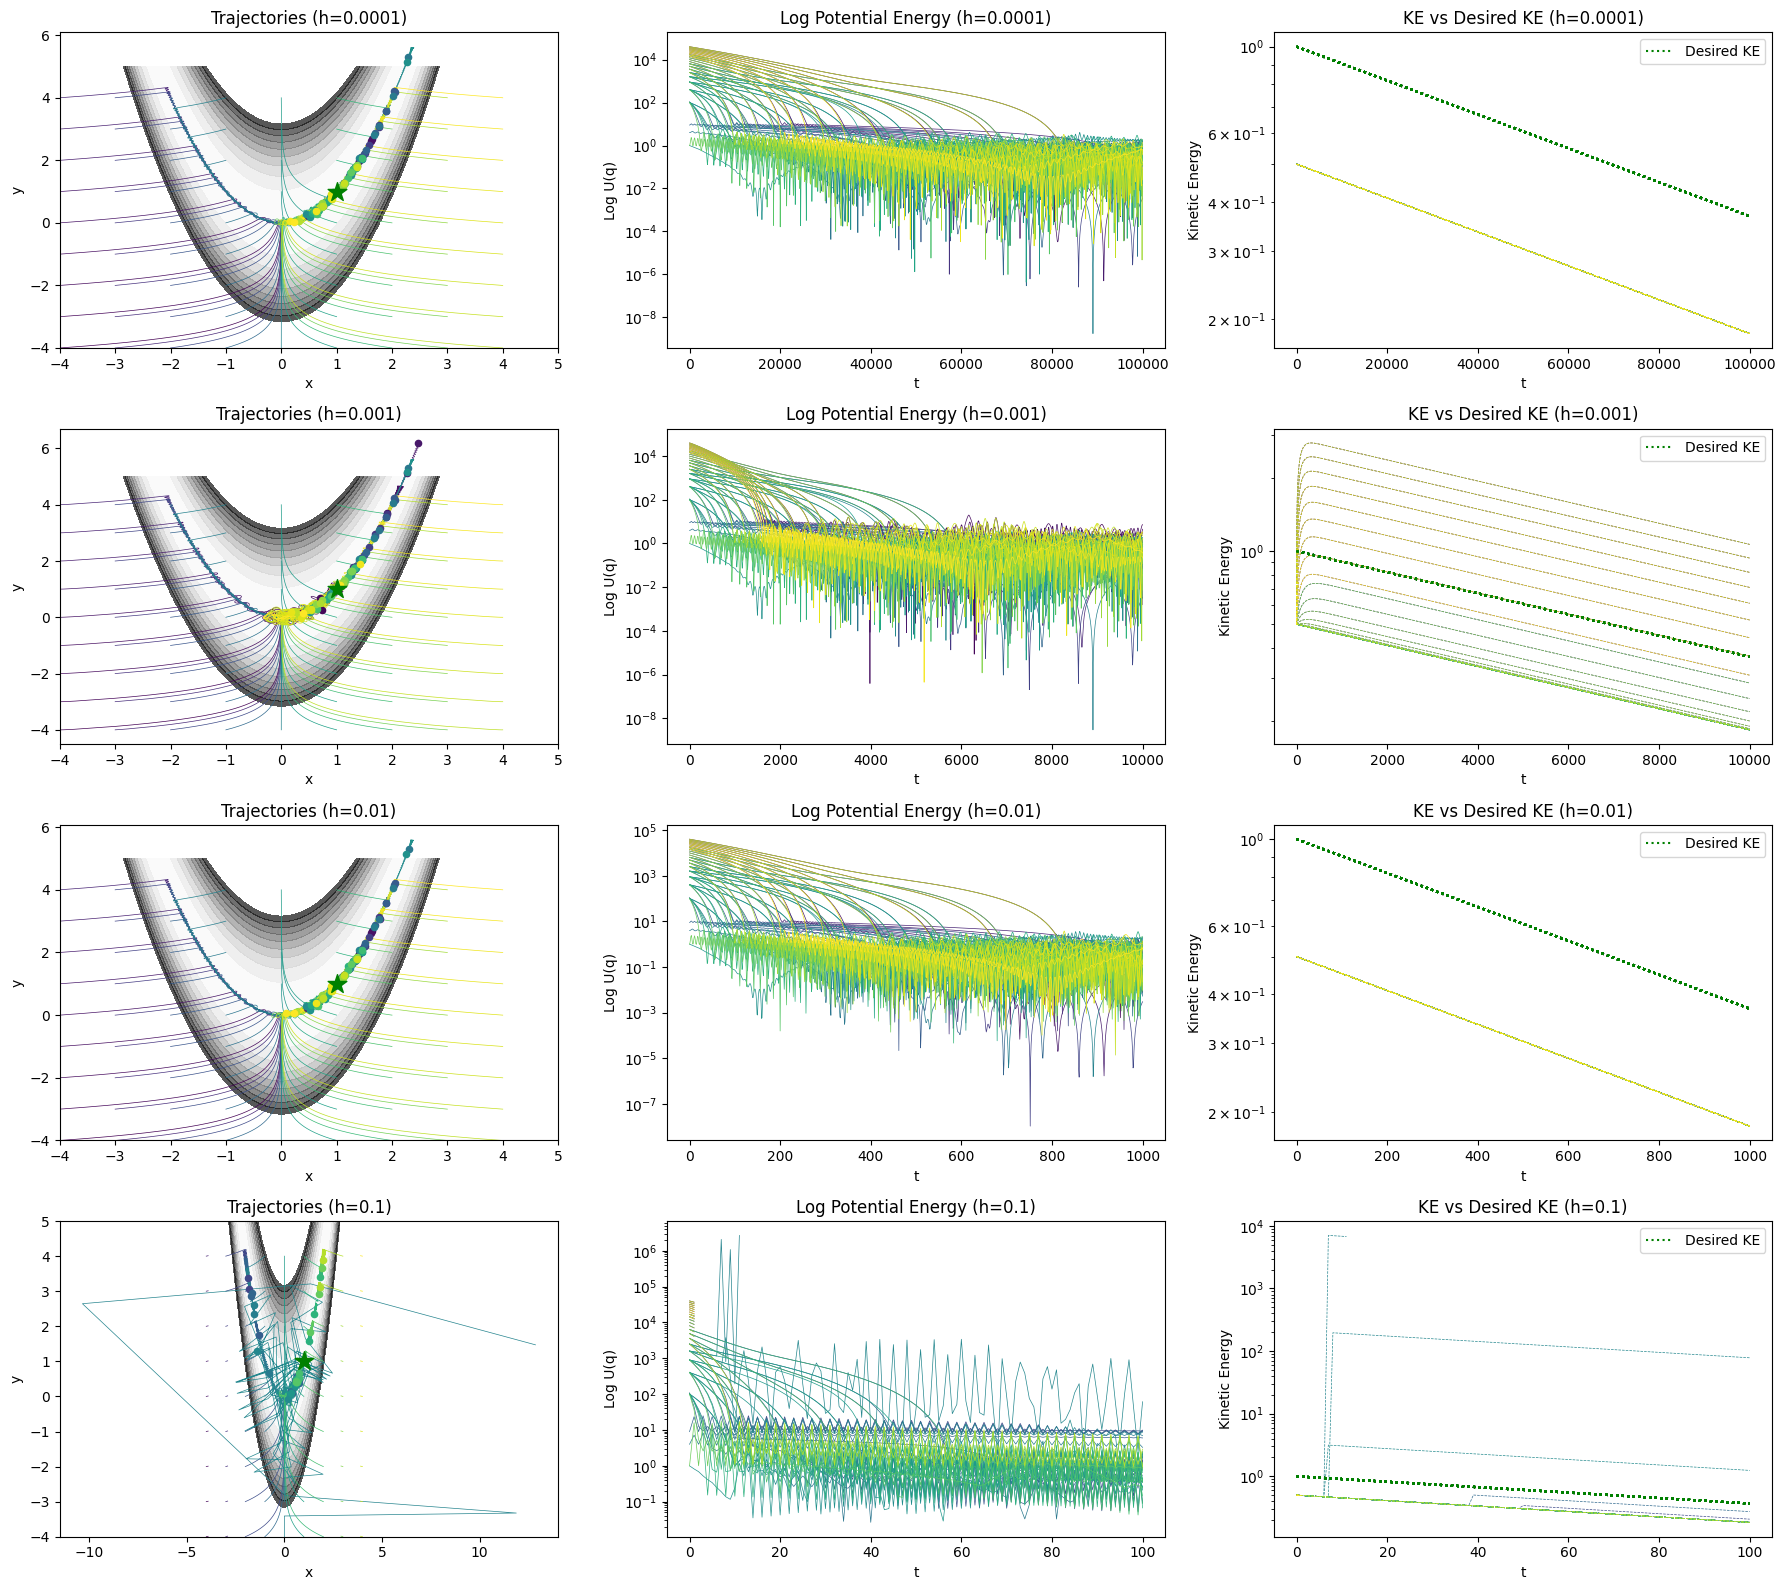

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kd_ub import kd_traj

def U_rosenbrock(x, P):
    return (P['coeff'][0] - x[0])**2 + P['coeff'][1] * (x[1] - x[0]**2)**2

def F_rosenbrock(x, P):
    return -np.array([
        -2 * (P['coeff'][0] - x[0]) - 4 * P['coeff'][1] * (x[1] - x[0]**2) * x[0],
        2 * P['coeff'][1] * (x[1] - x[0]**2)
    ]).astype(float)

# Define the parameters and setup
Pars = {
    'gamma': .1,
    'coeff': [1, 100],
    'decay': {
        'c': lambda t, P: np.exp(-P['gamma'] * t),
        'cp': lambda t, P: -P['gamma'] * np.exp(-P['gamma'] * t),
        'csqrt': lambda t, P: np.sqrt(np.exp(-P['gamma'] * t))
    }
}
Model = {'U': U_rosenbrock, 'F': F_rosenbrock}
step_sizes = [1e-4, 1e-3, 1e-2, 1e-1]
T_final = 10  # Fixed total simulation time

# Define the grid for contour plot
x_vals = np.linspace(-4, 5, 100)
y_vals = np.linspace(-4, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.array([[U_rosenbrock([x, y], Pars) for x, y in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

# Initialize trajectory starting points
x_grid = np.array([[i, j] for i in range(-4, 5) for j in range(-4, 5)])
num_trajectories = len(x_grid)
colors = plt.cm.viridis(np.linspace(0, 1, num_trajectories))  # Unique colors per trajectory

# Create figure layout
fig, axs = plt.subplots(len(step_sizes), 3, figsize=(18, 4 * len(step_sizes)))

for row, h in enumerate(step_sizes):
    print(h)
    Ns = int(T_final / h)

    # Plot contour and trajectories
    axs[row, 0].contourf(X, Y, Z, levels=np.linspace(0, 1000, 10), cmap='Greys', alpha=0.7)

    for idx, x0 in enumerate(x_grid):
        color = colors[idx]
        p0 = F_rosenbrock(x0, Pars)
        p0 /= np.linalg.norm(p0) if np.linalg.norm(p0) != 0 else 1
        T, X_traj, P, KE, PE = kd_traj(x0, p0, h, Ns, Pars, Model)
        X_traj = np.array(X_traj)

        # Plot trajectory
        axs[row, 0].plot(X_traj[:, 0], X_traj[:, 1], linewidth=0.5, color=color, zorder=1)
        axs[row, 0].scatter(X_traj[-1, 0], X_traj[-1, 1], color=color, s=20, zorder=2)  # Mark end point

        # Plot loss (log potential energy)
        axs[row, 1].semilogy(T/h, PE, linewidth=0.5, color=color)

        # Plot kinetic energy vs desired KE
        axs[row, 2].semilogy(T/h, 0.5 * np.linalg.norm(P, axis=1)**2, linewidth=0.5, color=color, linestyle='dashed')
        axs[row, 2].semilogy(T/h, np.exp(-Pars['gamma'] * T), color='green', linestyle='dotted', label='Desired KE' if idx == 0 else None)

    # Labels and titles
    axs[row, 0].scatter(1, 1, color='green', s=200, marker='*', label='Global Minimum', zorder=2)
    axs[row, 0].set_xlabel('x')
    axs[row, 0].set_ylabel('y')
    axs[row, 0].set_title(f'Trajectories (h={h})')

    axs[row, 1].set_xlabel('t')
    axs[row, 1].set_ylabel('Log U(q)')
    axs[row, 1].set_title(f'Log Potential Energy (h={h})')

    axs[row, 2].set_xlabel('t')
    axs[row, 2].set_ylabel('Kinetic Energy')
    axs[row, 2].set_title(f'KE vs Desired KE (h={h})')
    axs[row, 2].legend()

plt.tight_layout()
plt.show()


# Ackley's Function (h >= 0.5 is not included as it diverges)

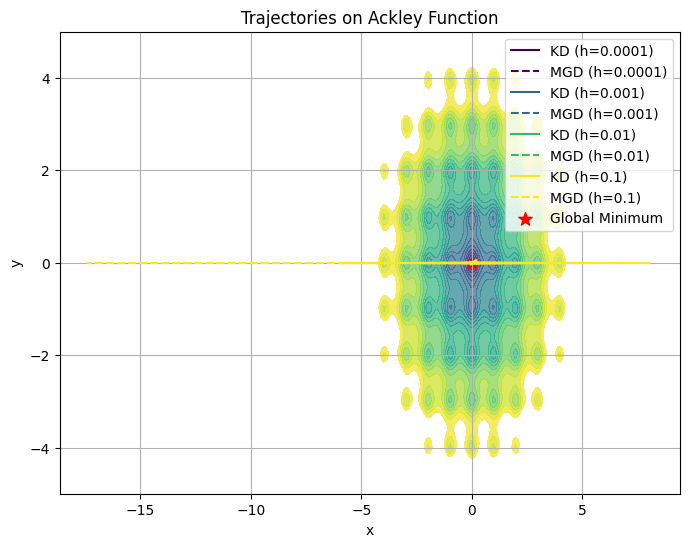

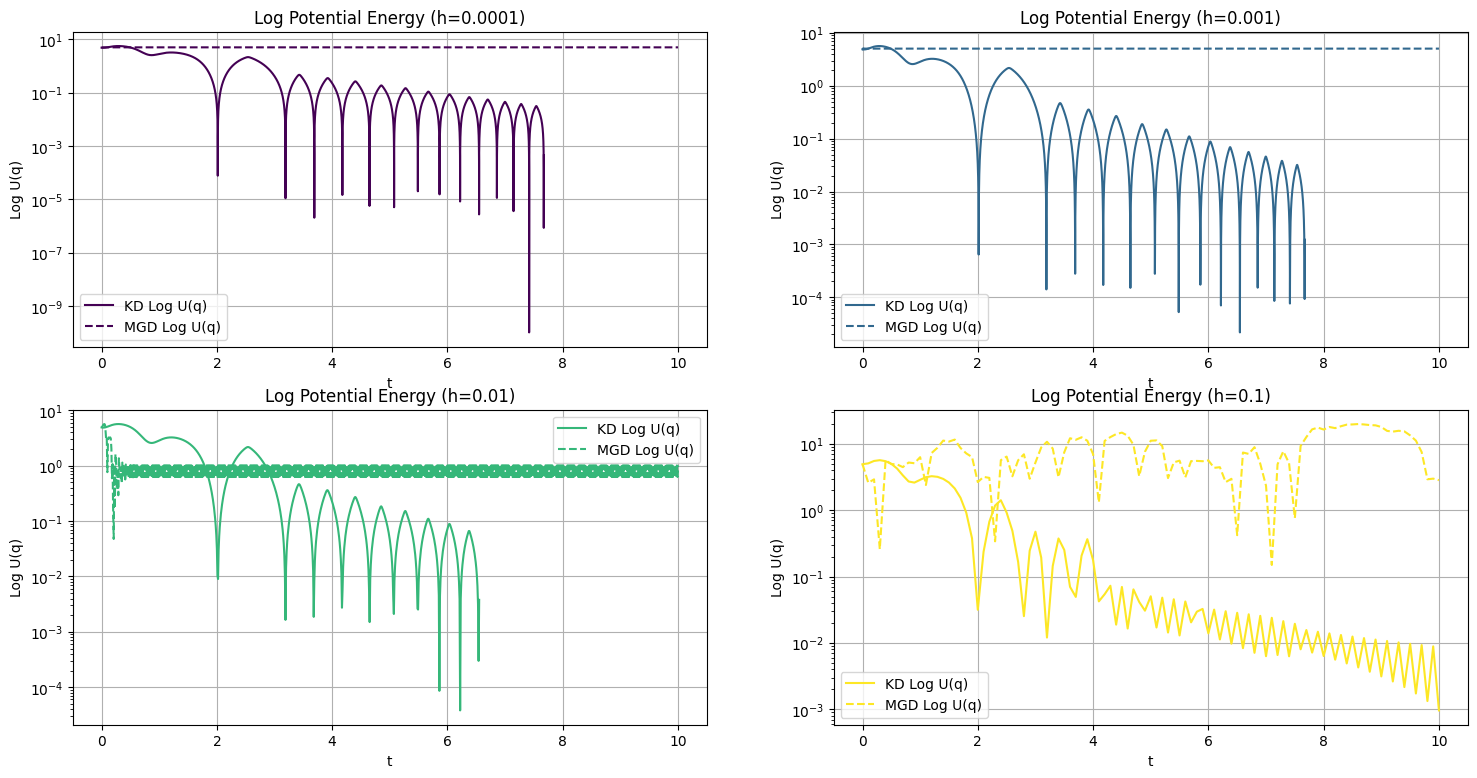

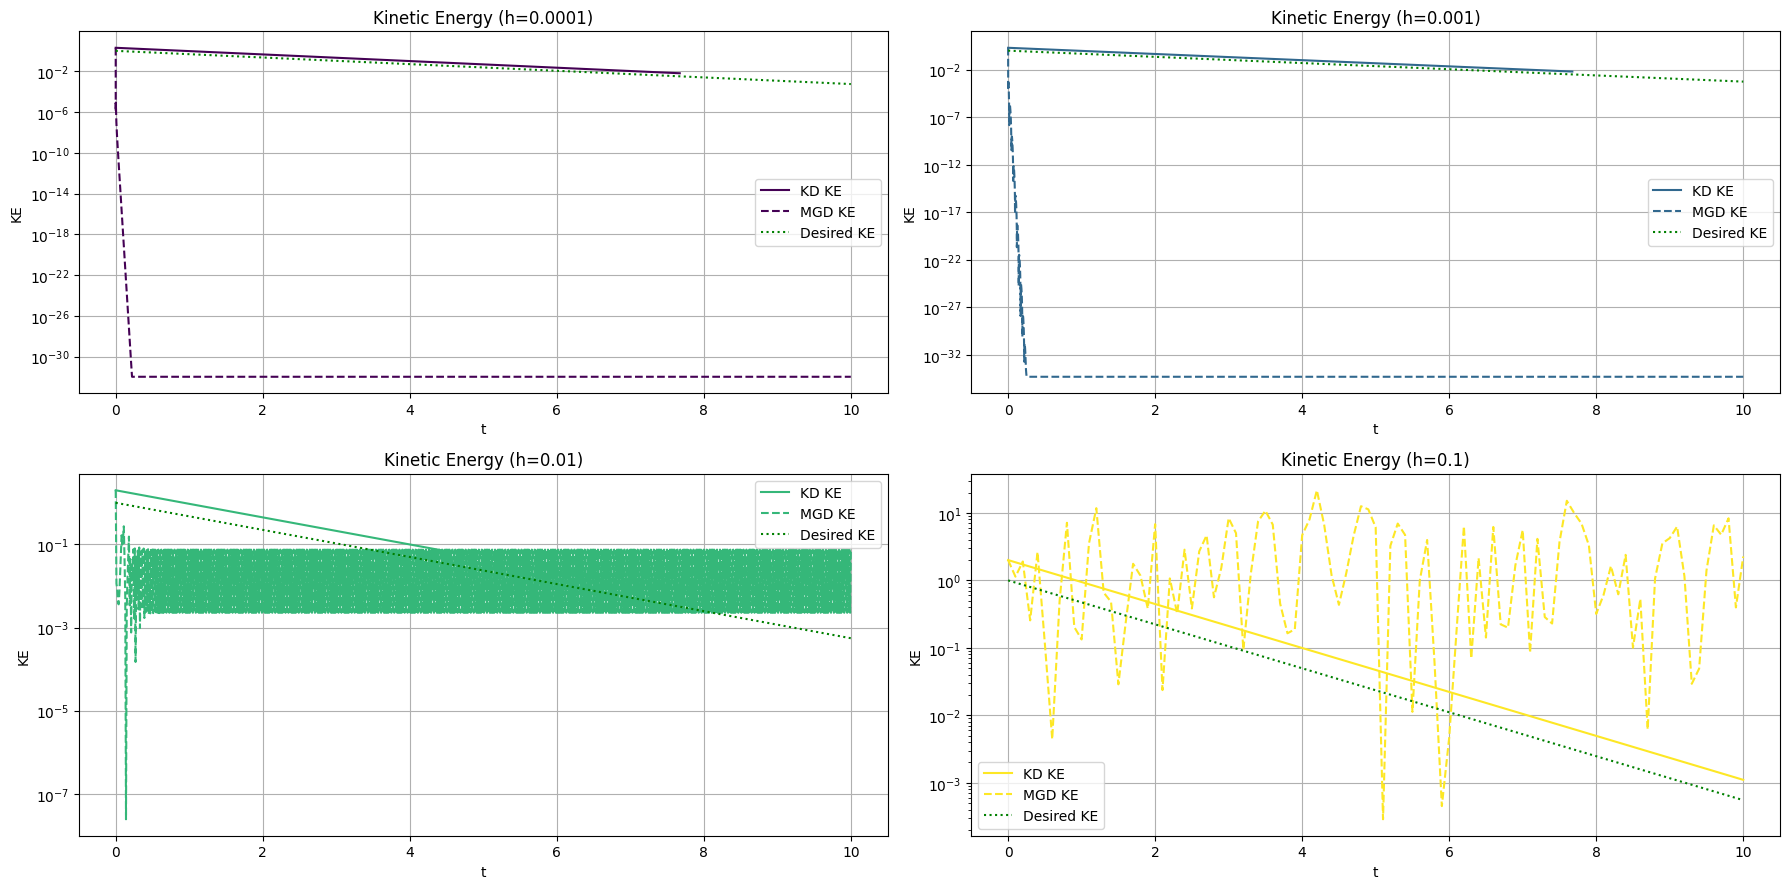

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from kd_ub import kd_traj, gd_traj
# Define Parameters
Pars = {}
Model = {}
Pars['gamma'] = 0.75
Pars['beta'] = 0.75
c0 = 1
decay_exp = {
    'c': lambda t, P: c0 * np.exp(-P['gamma'] * t),
    'cp': lambda t, P: -P['gamma'] * c0 * np.exp(-P['gamma'] * t),
    'csqrt': lambda t, P: np.sqrt(c0 * np.exp(-P['gamma'] * t))
}
Pars['decay'] = decay_exp

# Ackley function
U = lambda x, P: -20 * np.exp(-0.2 * np.sqrt(0.5 * np.sum(x**2))) - \
                 np.exp(0.5 * np.sum(np.cos(2 * np.pi * x))) + np.e + 20

# Negative gradient of Ackley function
F = lambda x, P: np.array([
    20 * np.exp(-0.2 * np.sqrt(0.5 * np.sum(x**2))) * (-x[i] / (np.sqrt(2 * np.sum(x**2)))) +
    np.exp(0.5 * np.sum(np.cos(2 * np.pi * x))) * (-np.sin(2 * np.pi * x[i]) * 2 * np.pi)
    for i in range(len(x))
])

Model['U'] = U
Model['F'] = F

# Initial conditions
q0 = np.array([-2, 0.])
p0 = F(q0, Pars) + np.random.randn(2)
p0 = (p0 / np.linalg.norm(p0)) * np.sqrt(2 * c0)

# Step sizes and simulation parameters
step_sizes = [1e-4, 1e-3, 1e-2, 1e-1]
T_final = 10  # Fixed total simulation time
trajectories = {}

# Compute trajectories
for h in step_sizes:
    Ns = int(T_final / h)
    T, Q, P, KE, PE = kd_traj(q0, p0, h, Ns, Pars, Model, tol=1e-5)
    T_gd, Q_gd, P_gd, KE_gd, PE_gd = gd_traj(q0, p0, h, Ns, Pars, Model)
    trajectories[h] = (T, Q, P, KE, PE, T_gd, Q_gd, P_gd, KE_gd, PE_gd)

# Define grid for contour plot
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = -20 * np.exp(-0.2 * np.sqrt(0.5 * (X**2 + Y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * X) + np.cos(2 * np.pi * Y))) + np.e + 20

# Plot all trajectories on contour plot
fig_contour, ax_contour = plt.subplots(figsize=(8, 6))
ax_contour.contourf(X, Y, Z, levels=np.linspace(0, 10, 20), cmap='viridis', alpha=0.7)
colors = plt.cm.viridis(np.linspace(0, 1, len(step_sizes)))

for i, h in enumerate(step_sizes):
    _, Q, _, _, _, _, Q_gd, _, _, _ = trajectories[h]
    ax_contour.plot(Q[:, 0], Q[:, 1], label=f'KD (h={h})', color=colors[i], lw=1.5)
    ax_contour.plot(Q_gd[:, 0], Q_gd[:, 1], '--', color=colors[i], lw=1.5, label=f'MGD (h={h})')

ax_contour.scatter(0, 0, color='red', s=100, marker='*', label='Global Minimum')
ax_contour.set_xlabel('x')
ax_contour.set_ylabel('y')
ax_contour.set_title('Trajectories on Ackley Function')
ax_contour.legend()
ax_contour.grid(True)

# Plot energy diagnostics (2x4 grid)
fig, axs = plt.subplots(2, 2, figsize=(18, 9))

for i, h in enumerate(step_sizes):
    T, _, _, KE, PE, T_gd, _, _, KE_gd, PE_gd = trajectories[h]
    row, col = divmod(i, 2)

    # Log potential energy plot
    axs[row, col].semilogy(T, PE, label='KD Log U(q)', color=colors[i])
    axs[row, col].semilogy(T_gd, PE_gd, '--', label='MGD Log U(q)', color=colors[i])
    axs[row, col].set_title(f'Log Potential Energy (h={h})')
    axs[row, col].set_xlabel('t')
    axs[row, col].set_ylabel('Log U(q)')
    axs[row, col].legend()
    axs[row, col].grid(True)

fig_ke, axs_ke = plt.subplots(2, 2, figsize=(18, 9))

for i, h in enumerate(step_sizes):
    T, _, P, KE, _, T_gd, _, P_gd, KE_gd, _ = trajectories[h]
    row, col = divmod(i, 2)

    # Kinetic energy plot
    axs_ke[row, col].semilogy(T, KE, label='KD KE', color=colors[i])
    axs_ke[row, col].semilogy(T_gd, KE_gd, '--', label='MGD KE', color=colors[i])
    axs_ke[row, col].semilogy(T, np.exp(-Pars['gamma'] * T), label='Desired KE', color='green', linestyle='dotted')

    axs_ke[row, col].set_title(f'Kinetic Energy (h={h})')
    axs_ke[row, col].set_xlabel('t')
    axs_ke[row, col].set_ylabel('KE')
    axs_ke[row, col].legend()
    axs_ke[row, col].grid(True)

plt.tight_layout()
plt.show()


# Matyas Function

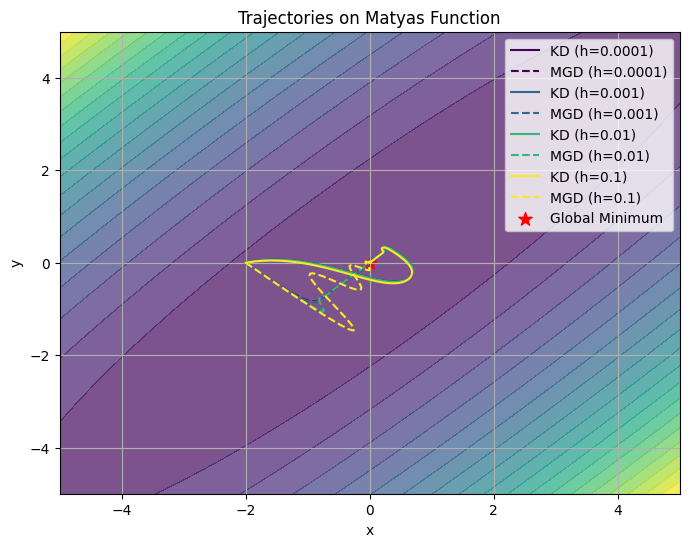

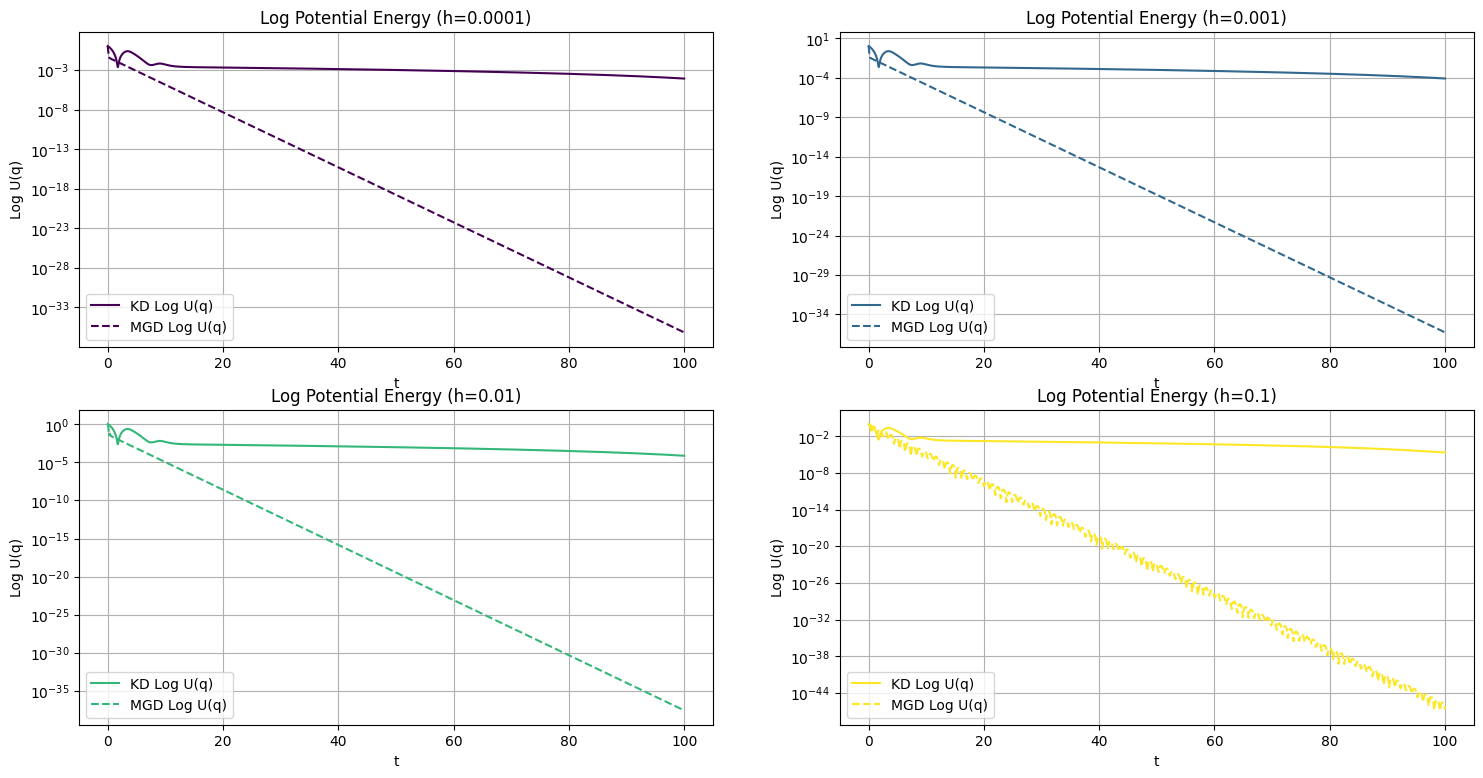

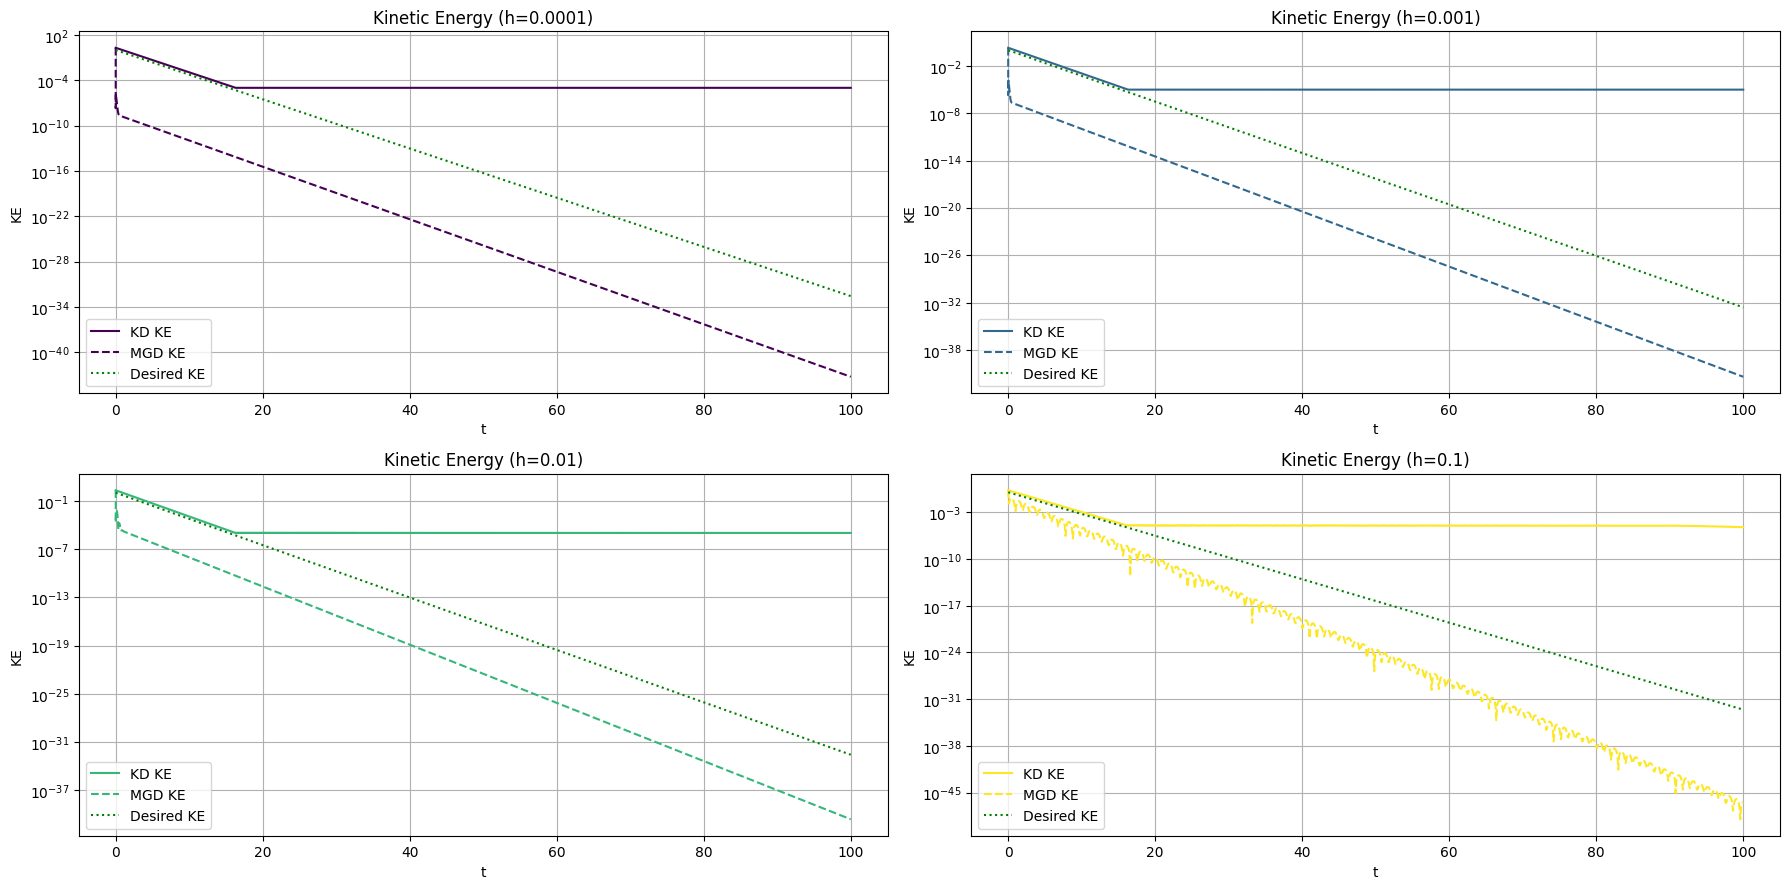

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from kd_ub import kd_traj, gd_traj

# Define Parameters
Pars = {}
Model = {}
Pars['gamma'] = 0.75
Pars['beta'] = 0.9
c0 = 1
decay_exp = {
    'c': lambda t, P: c0 * np.exp(-P['gamma'] * t),
    'cp': lambda t, P: -P['gamma'] * c0 * np.exp(-P['gamma'] * t),
    'csqrt': lambda t, P: np.sqrt(c0 * np.exp(-P['gamma'] * t))
}
Pars['decay'] = decay_exp

# Matyas function
U = lambda x, P: 0.26 * np.sum(x**2) - 0.48 * np.prod(x)

# Negative gradient of Matyas function
F = lambda x, P: - np.array([
    0.52 * x[0] - 0.48 * x[1],
    0.52 * x[1] - 0.48 * x[0]
])

Model['U'] = U
Model['F'] = F

# Initial conditions
q0 = np.array([-2, 0.])
p0 = F(q0, Pars) + np.random.randn(2)
p0 = (p0 / np.linalg.norm(p0)) * np.sqrt(2 * c0)

# Step sizes and simulation parameters
step_sizes = [1e-4, 1e-3, 1e-2, 1e-1]
T_final = 100  # Fixed total simulation time
trajectories = {}

# Compute trajectories
for h in step_sizes:
    Ns = int(T_final / h)
    T, Q, P, KE, PE = kd_traj(q0, p0, h, Ns, Pars, Model, tol=1e-5)
    T_gd, Q_gd, P_gd, KE_gd, PE_gd = gd_traj(q0, p0, h, Ns, Pars, Model)
    trajectories[h] = (T, Q, P, KE, PE, T_gd, Q_gd, P_gd, KE_gd, PE_gd)

# Define grid for contour plot
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.26 * (X**2 + Y**2) - 0.48 * X * Y

# Plot all trajectories on contour plot
fig_contour, ax_contour = plt.subplots(figsize=(8, 6))
ax_contour.contourf(X, Y, Z, levels=np.linspace(np.min(Z), np.max(Z), 20), cmap='viridis', alpha=0.7)
colors = plt.cm.viridis(np.linspace(0, 1, len(step_sizes)))

for i, h in enumerate(step_sizes):
    _, Q, _, _, _, _, Q_gd, _, _, _ = trajectories[h]
    ax_contour.plot(Q[:, 0], Q[:, 1], label=f'KD (h={h})', color=colors[i], lw=1.5)
    ax_contour.plot(Q_gd[:, 0], Q_gd[:, 1], '--', color=colors[i], lw=1.5, label=f'MGD (h={h})')

ax_contour.scatter(0, 0, color='red', s=100, marker='*', label='Global Minimum')
ax_contour.set_xlabel('x')
ax_contour.set_ylabel('y')
ax_contour.set_title('Trajectories on Matyas Function')
ax_contour.legend()
ax_contour.grid(True)

# Plot energy diagnostics (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(18, 9))

for i, h in enumerate(step_sizes):
    T, _, _, KE, PE, T_gd, _, _, KE_gd, PE_gd = trajectories[h]
    row, col = divmod(i, 2)

    # Log potential energy plot
    axs[row, col].semilogy(T, PE, label='KD Log U(q)', color=colors[i])
    axs[row, col].semilogy(T_gd, PE_gd, '--', label='MGD Log U(q)', color=colors[i])
    axs[row, col].set_title(f'Log Potential Energy (h={h})')
    axs[row, col].set_xlabel('t')
    axs[row, col].set_ylabel('Log U(q)')
    axs[row, col].legend()
    axs[row, col].grid(True)

fig_ke, axs_ke = plt.subplots(2, 2, figsize=(18, 9))

for i, h in enumerate(step_sizes):
    T, _, P, KE, _, T_gd, _, P_gd, KE_gd, _ = trajectories[h]
    row, col = divmod(i, 2)

    # Kinetic energy plot
    axs_ke[row, col].semilogy(T, KE, label='KD KE', color=colors[i])
    axs_ke[row, col].semilogy(T_gd, KE_gd, '--', label='MGD KE', color=colors[i])
    axs_ke[row, col].semilogy(T, np.exp(-Pars['gamma'] * T), label='Desired KE', color='green', linestyle='dotted')

    axs_ke[row, col].set_title(f'Kinetic Energy (h={h})')
    axs_ke[row, col].set_xlabel('t')
    axs_ke[row, col].set_ylabel('KE')
    axs_ke[row, col].legend()
    axs_ke[row, col].grid(True)

plt.tight_layout()
plt.show()
